# MIT-BIH Arrhythmia Data Analysis

## Overview

- Set of over 4000 long-term Holter Recordings
- Obtained by the Beth Israel Hospital Arrhythmia Laboratory
- Obtained betwee 1975 and 1979
- **60% of the recordings were obtainer from inpatients**
- **23 records in total chosen from id 100-124 inclusive (Group A)**
- **25 records chosen from ids 200-234 inclusive (Group B)**
- **Total there are 48 records**
- **Each record is 30 minutes long**
- **2 signals recorded**
- Group B records were chosen to include complex ventricular,junctional and supraventricular arrhythmias and conduction abnormalities
- Subjects were 25 men aged 32 to 89 years, 22 women aged 23 to 89 years.
- Records 201 and 202 came from the same male subject

## ECG Lead Configuration
- Most records the first signal seen is the modified limb lead II(MLII) obtained by placing the electrodes on the chest
- The lower signal is a modified lead V1
- QRS Complexes are seen in the MLII signal only
- Normal beats are difficult to discern in the lower signal

## Exceptions

- Record 114 the signals are reversed .i.e MLII is the second signal.
- Records 102 and 104 do not have MLII signal because of surgical dressing, modified lead V5 used for the upped signal.
- 4 records (102,104,107,217) include paced beats 


## Digitisation process

The digitization process happend at **360Hz**
The ADCs were unipolar, with 11 bit resolution ranging from +5mv to -5mV
Sample values range from 0 to 2047 inclusive with a value of 1024 corresponding to 0

A number of frequency-domain artifacts have been identified and related to specific mechanical components of the recorders and the playback unit:


| Frequency(Hz)     | Source |
| ----------- | ----------- |
| 0.042      | Recorder pressure wheel       |
| 0.083   | Playback unit capstan     |
| 0.090 | Recorder capstan |
|0.167 | Playback unit capstan |
| 0.10-0.18 |Takeup reel |
| 0.20-0.36 | Supply reel  |


- **Bit Depth(n)**: 11
- **Levels(2<sup>n</sup>)**:2048
- **Voltage Range(r)**: 10mV
- **Step Size(delta)**: 4.88x10<sup>-3</sup>mV
- **Maximum Voltage**: 5mV
- **Minimum Voltage**: -5mV

Calculations:
```
Index = Round((Xalpha - Xmin)/delta) # Calculate the corresponding discrete value for a voltage

Xalpha = Xmin + (Index*delta) # Calculate the corresponding voltage for a discrete value.
```

## Exploration

In [1]:
from data_set_utils.data_reader import DataReader

In [2]:
%matplotlib inline

In [3]:
path = "/mnt/d/git/Arrhythmia-Detection/raw_data/mit-bih-arrhythmia-database-1.0.0"
dr = DataReader(path, 11, 5, -5)
columns = ["N", "/", "R", "L", "V", "gender", "age", "leads"]

### Example Record

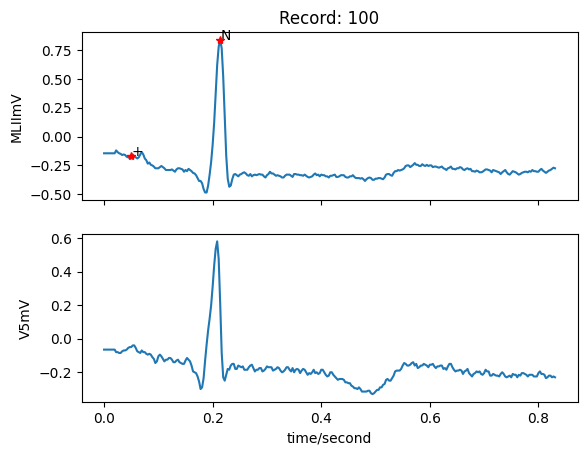

In [4]:
dr.plot_record("100", 300)

In [5]:
from utils.common_utils import load_patient_ids

In [6]:
patient_ids = load_patient_ids(path)

In [7]:
patient_ids.remove("102-0")

In [8]:
patient_ids

['100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '121',
 '122',
 '123',
 '124',
 '200',
 '201',
 '202',
 '203',
 '205',
 '207',
 '208',
 '209',
 '210',
 '212',
 '213',
 '214',
 '215',
 '217',
 '219',
 '220',
 '221',
 '222',
 '223',
 '228',
 '230',
 '231',
 '232',
 '233',
 '234']

In [9]:
len(patient_ids)

48

### Loading all patient records

In [10]:
records = dr.load_records(record_ids=patient_ids)

#### Counting annotations in all records

In [11]:
from data_set_utils.data_reader import count_annotations

In [12]:
count_tuple = count_annotations(records)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.DataFrame(data={"Count": count_tuple[1]}, index=count_tuple[0])

<Axes: >

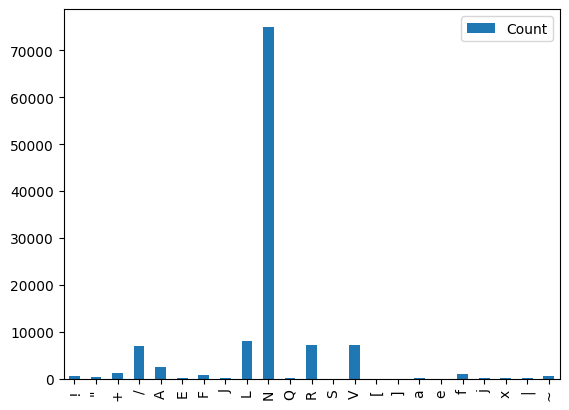

In [15]:
df.plot(kind="bar")

In [16]:
patient_data = dict()
patient_data["id"] = patient_ids

In [17]:
for i in count_tuple[0]:
    patient_data[i] = [0] * len(patient_ids)

In [18]:
patient_data_frame = pd.DataFrame(data=patient_data)

In [19]:
patient_data_frame.set_index("id", inplace=True)

In [20]:
ages = []
gender = []
leads = []
for record_id in patient_data["id"]:
    ecg_record = dr.load_record(record_id)
    ages.append(ecg_record.patient_age())
    gender.append(ecg_record.patient_gender())
    leads.append(ecg_record.leads())
    record_annotation_count_tuple = count_annotations([ecg_record])
    for symbol, count in zip(
        record_annotation_count_tuple[0], record_annotation_count_tuple[1]
    ):
        patient_data_frame.loc[record_id][symbol] = count

In [21]:
patient_data_frame["age"] = np.array(ages)

In [22]:
patient_data_frame["gender"] = np.array(gender)

In [23]:
lead_matrix = np.array(leads)
patient_data_frame["First lead"] = lead_matrix[:, 0]
patient_data_frame["Second Lead"] = lead_matrix[:, 1]

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


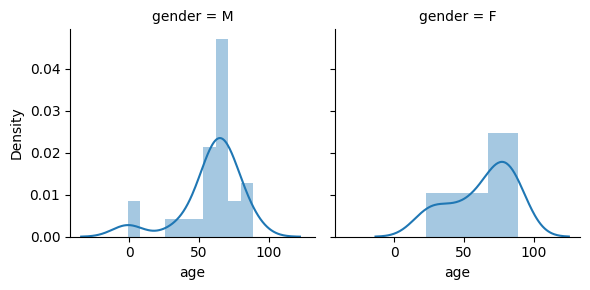

In [24]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "age")

<Axes: xlabel='gender', ylabel='count'>

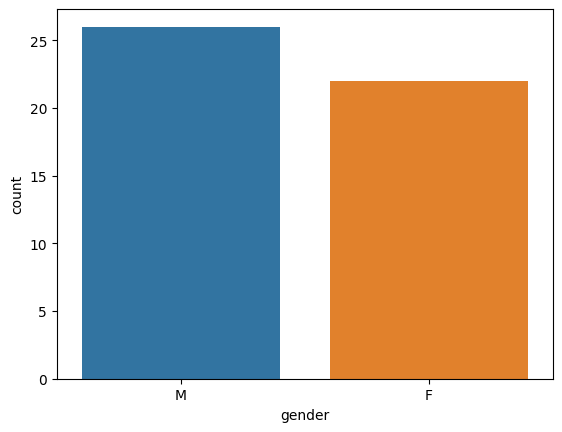

In [25]:
sns.countplot(data=patient_data_frame, x="gender")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


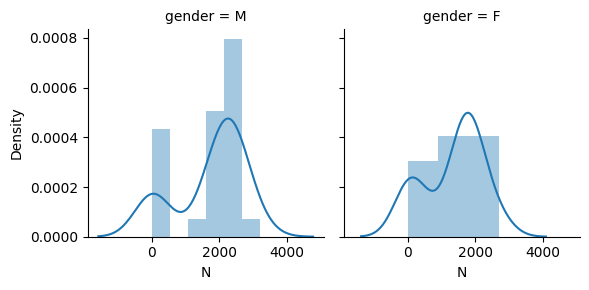

In [26]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "N")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


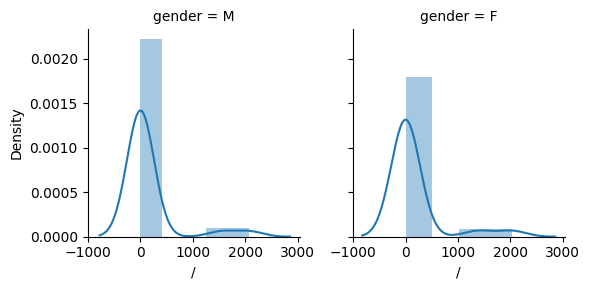

In [27]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "/")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


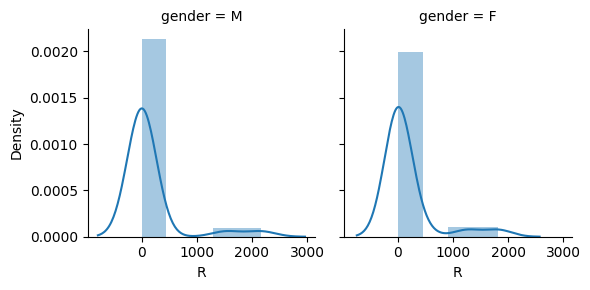

In [28]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "R")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


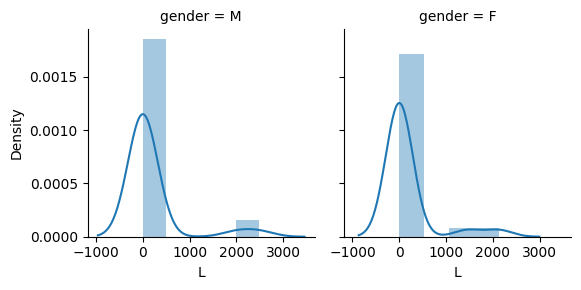

In [29]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "L")

/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/alton/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


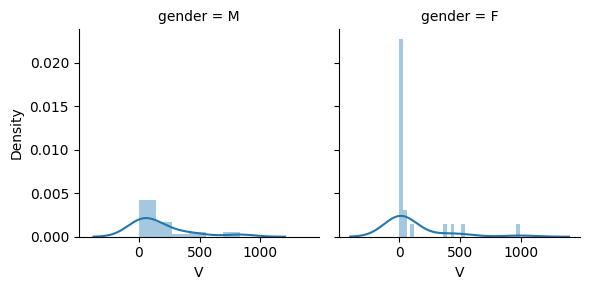

In [30]:
g = sns.FacetGrid(data=patient_data_frame, col="gender")
g.map(sns.distplot, "V")

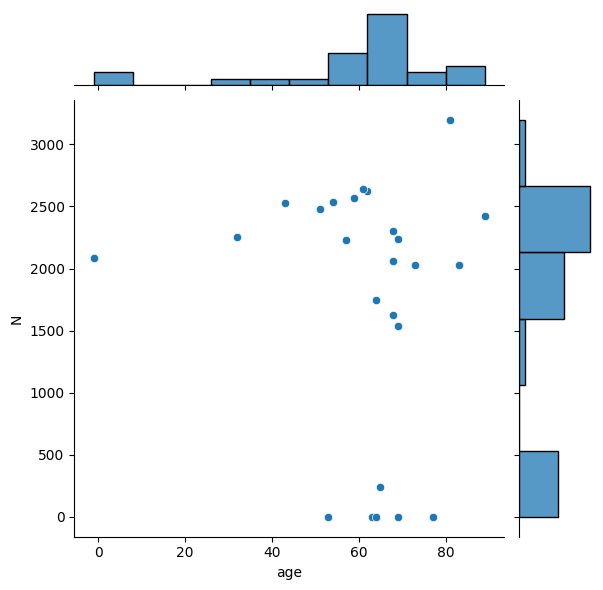

In [31]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="N"
)

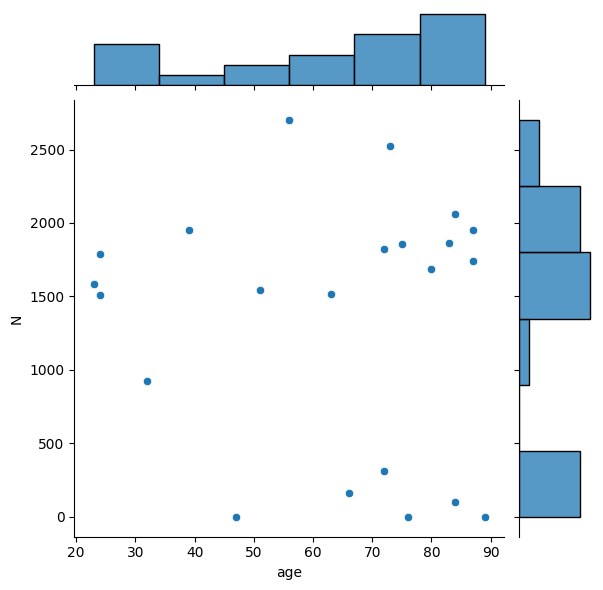

In [32]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="N"
)

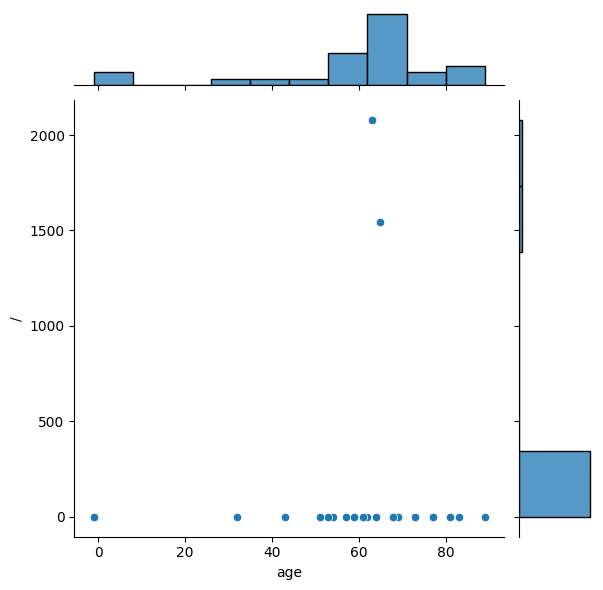

In [33]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="/"
)

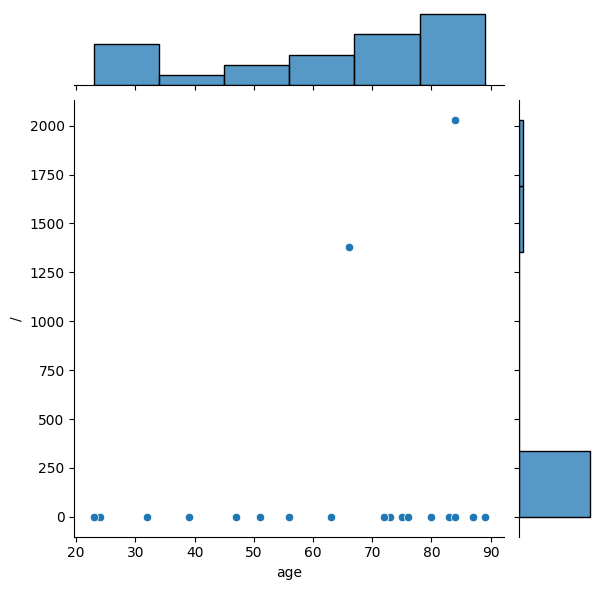

In [34]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="/"
)

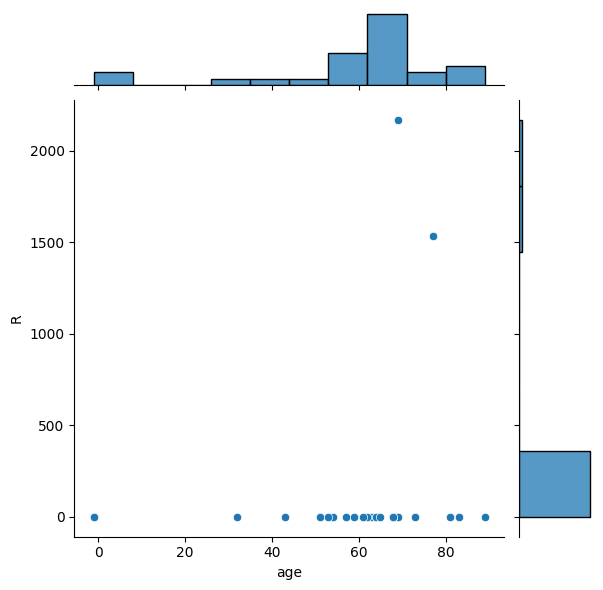

In [35]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="R"
)

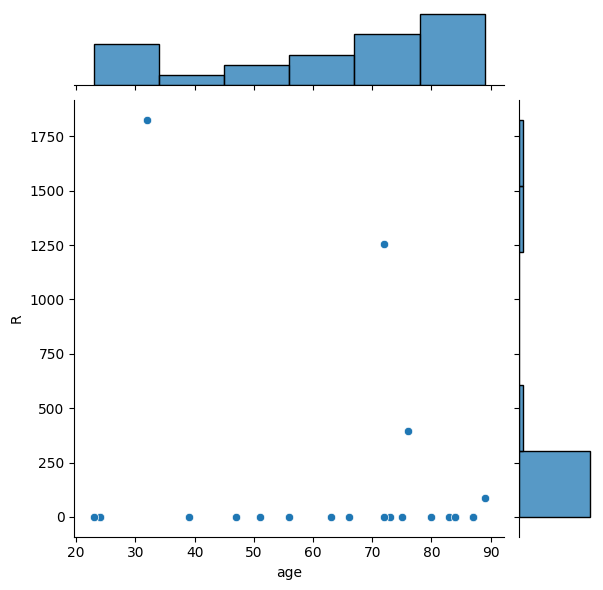

In [36]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="R"
)

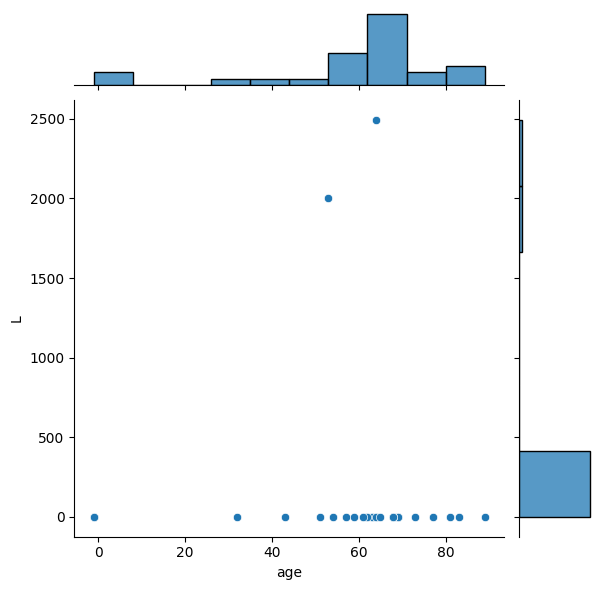

In [37]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="L"
)

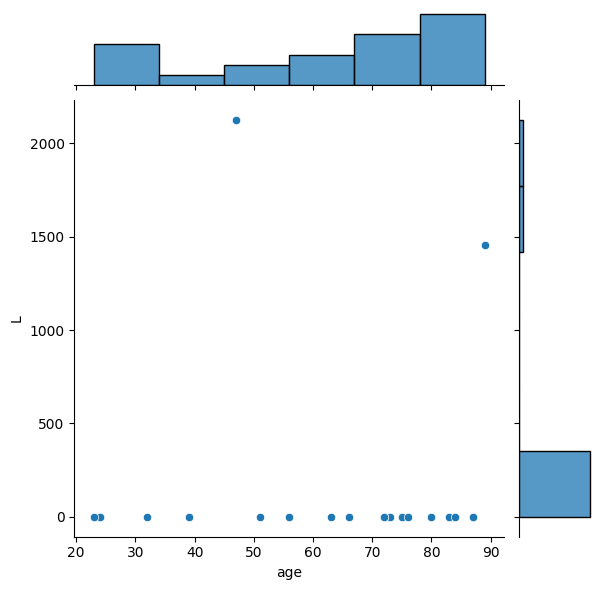

In [38]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="L"
)

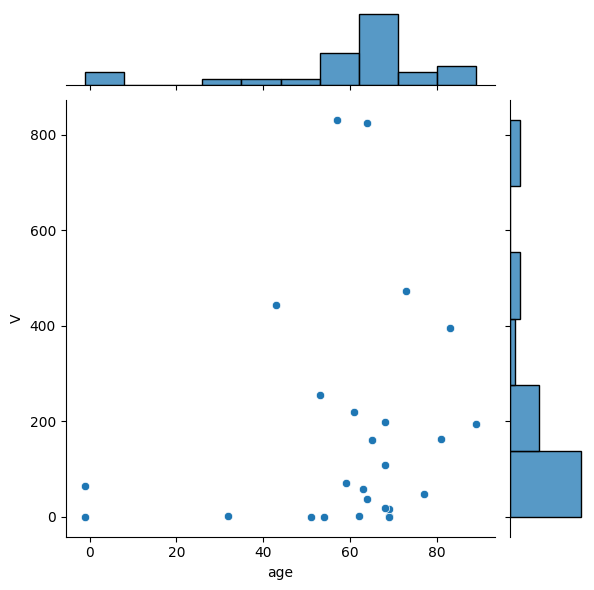

In [39]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "M"], x="age", y="V"
)

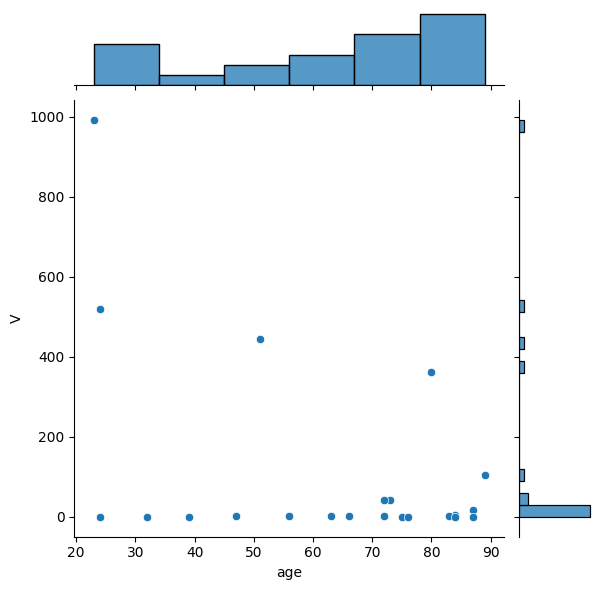

In [40]:
sns.jointplot(
    data=patient_data_frame[patient_data_frame["gender"] == "F"], x="age", y="V"
)

In [41]:
def categorize_age(age):
    if age > 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 60:
        return "40-60"
    elif age > 60 and age <= 80:
        return "60-80"
    elif age > 80 and age <= 100:
        return "80-100"
    else:
        return "Invalid"


patient_data_frame["age_category"] = patient_data_frame["age"].apply(categorize_age)

In [42]:
patient_data_frame.head()

,!,"""",+,/,A,E,F,J,L,N,...,f,j,x,|,~,age,gender,First lead,Second Lead,age_category
id,,,,,,,,,,,,,,,,,,,,,
100,0,0,1,0,33,0,0,0,0,2239,...,0,0,0,0,0,69,M,MLII,V5,60-80
101,0,0,1,0,3,0,0,0,0,1860,...,0,0,0,4,4,75,F,MLII,V1,60-80
102,0,0,5,2028,0,0,0,0,0,99,...,56,0,0,0,0,84,F,V5,V2,80-100
103,0,0,1,0,2,0,0,0,0,2082,...,0,0,0,0,6,-1,M,MLII,V2,Invalid
104,0,0,45,1380,0,0,0,0,0,163,...,666,0,0,0,37,66,F,V5,V2,60-80


<Axes: xlabel='age_category', ylabel='N'>

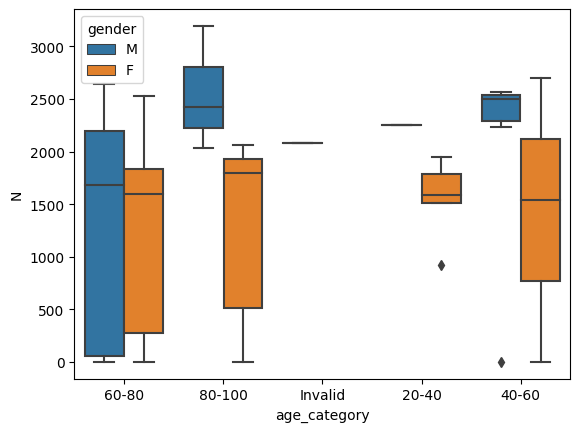

In [43]:
sns.boxplot(data=patient_data_frame, x="age_category", y="N", hue="gender")

<Axes: xlabel='age_category', ylabel='/'>

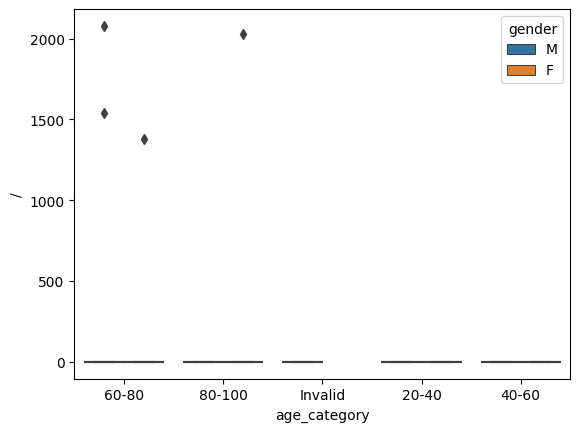

In [44]:
sns.boxplot(data=patient_data_frame, x="age_category", y="/", hue="gender")

<Axes: xlabel='age_category', ylabel='L'>

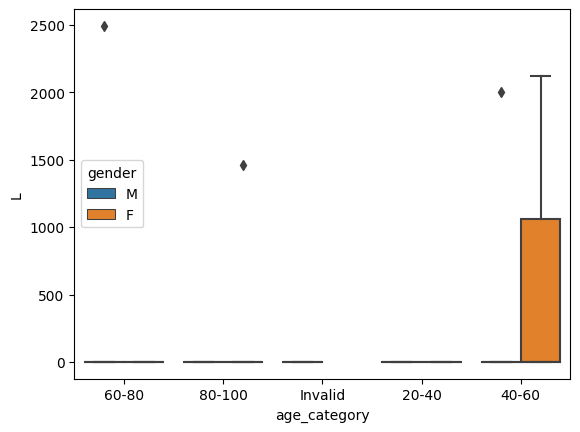

In [45]:
sns.boxplot(data=patient_data_frame, x="age_category", y="L", hue="gender")

<Axes: xlabel='age_category', ylabel='R'>

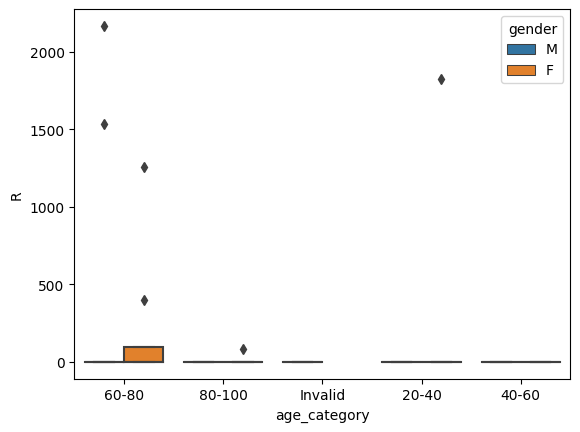

In [46]:
sns.boxplot(data=patient_data_frame, x="age_category", y="R", hue="gender")

<Axes: xlabel='age_category', ylabel='V'>

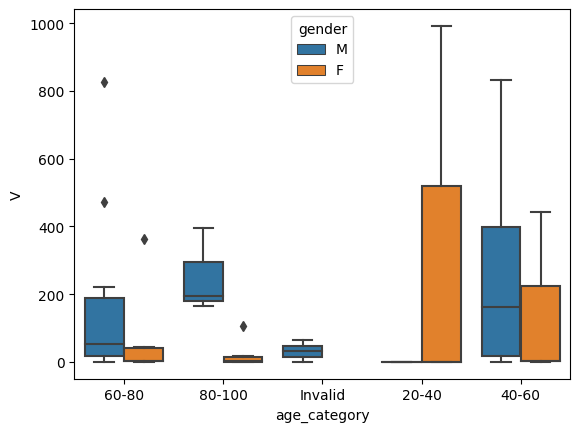

In [47]:
sns.boxplot(data=patient_data_frame, x="age_category", y="V", hue="gender")

<Axes: xlabel='age_category'>

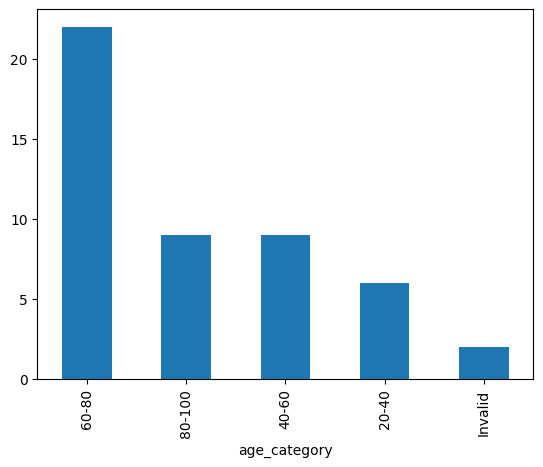

In [48]:
patient_data_frame["age_category"].value_counts().plot(kind="bar")

<Axes: xlabel='First lead'>

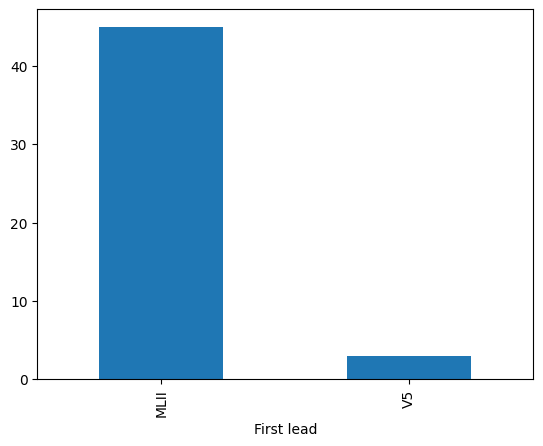

In [49]:
patient_data_frame["First lead"].value_counts().plot(kind="bar")

<Axes: xlabel='Second Lead'>

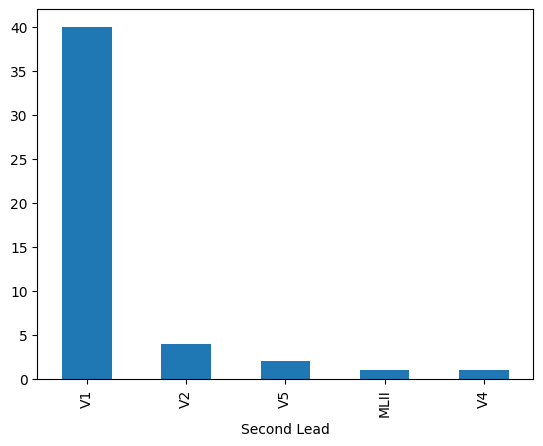

In [50]:
patient_data_frame["Second Lead"].value_counts().plot(kind="bar")

## Data Preprocessing

In [51]:
record100_raw = records[0].ecg_signal()

In [52]:
record100_raw

array([[-0.145, -0.065],
       [-0.145, -0.065],
       [-0.145, -0.065],
       ...,
       [-0.675, -0.365],
       [-0.765, -0.335],
       [-1.28 ,  0.   ]])

### Frequencies Present in the Signal

In [53]:
from scipy.fft import rfft, rfftfreq

In [54]:
yf = rfft(record100_raw[:800, 0])
xf = rfftfreq(len(record100_raw[:800, 0]), 1 / 360)

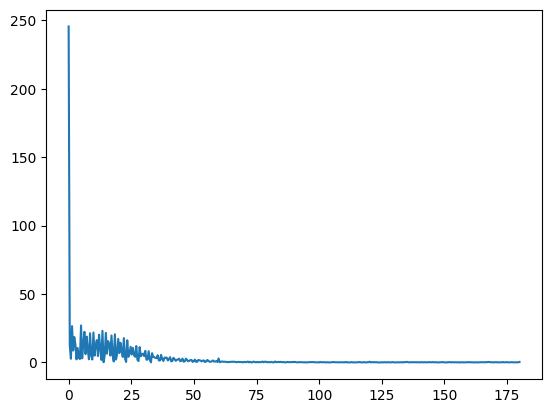

In [55]:
plt.plot(xf, np.abs(yf))

The human ECG spectrum covers the frequency range 0.05 Hz - 100 Hz, with the main part of the QRS complex being in the range 0.5 Hz - 45 Hz. Most of the time the ECG signal is overlaid by the mains frequency of 50 Hz/60 Hz.

### Removing Baseling Wandering

In [56]:
lead_II_signal = record100_raw[:, 0]

In [57]:
lead_II_signal

array([-0.145, -0.145, -0.145, ..., -0.675, -0.765, -1.28 ])

In [58]:
from utils.common_utils import remove_baseline_wander

new_signal_after_removal_of_baseline_wandering = remove_baseline_wander(lead_II_signal)

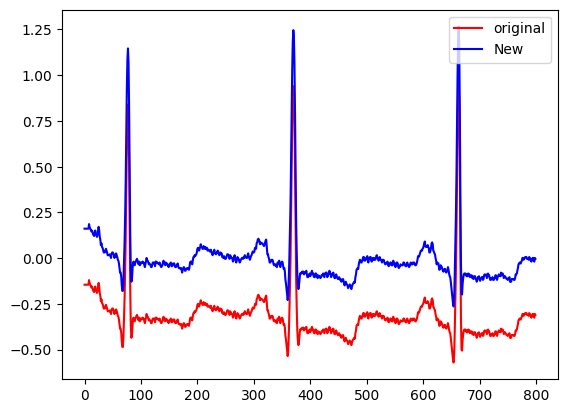

In [59]:
plt.plot(lead_II_signal[:800], color="red")
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="blue")
plt.legend(("original", "New"))

### Removing Power Line Interference

In [60]:
from utils.common_utils import remove_powerline_interference

new_signal_after_removal_p_intr = remove_powerline_interference(
    50, new_signal_after_removal_of_baseline_wandering, 360, 2
)

(array([86667, 86668, 86669, ..., 93886, 93887, 93888]),)


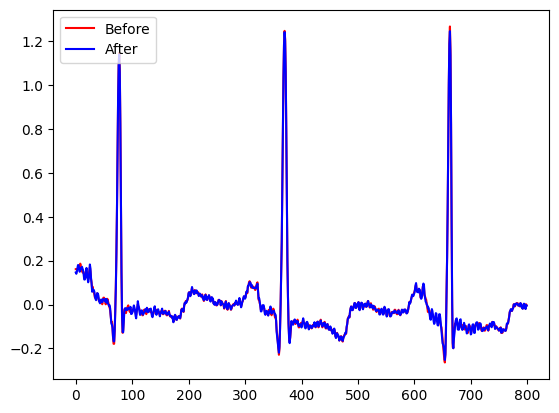

In [61]:
plt.plot(new_signal_after_removal_of_baseline_wandering[:800], color="red")
plt.plot(new_signal_after_removal_p_intr[:800], color="blue")
plt.legend(("Before", "After"))

In [62]:
yf_after = rfft(new_signal_after_removal_p_intr[:800])
xf_after = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)

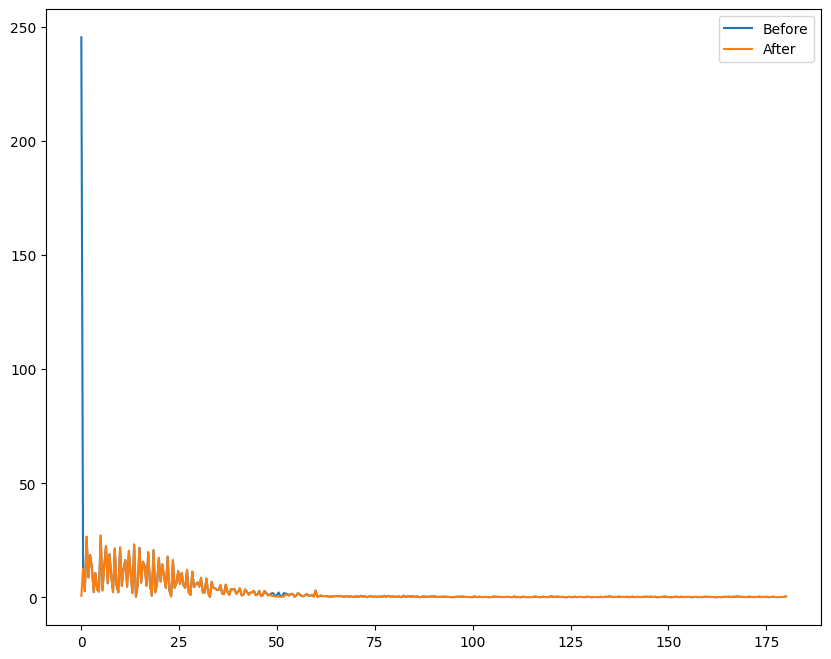

In [63]:
plt.figure(figsize=(10, 8))
plt.plot(xf, np.abs(yf))
plt.plot(xf_after, np.abs(yf_after))
plt.legend(("Before", "After"))

### High Pass Filter at 0.5Hz

In [64]:
from utils.common_utils import high_pass_filter

In [65]:
filteredHighPass = high_pass_filter(new_signal_after_removal_p_intr,0.5)

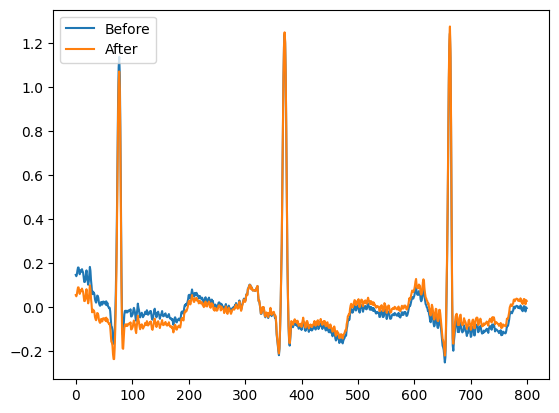

In [66]:
plt.plot(new_signal_after_removal_p_intr[:800])
plt.plot(filteredHighPass[:800])
plt.legend(("Before","After"))

In [67]:
yf_before = rfft(new_signal_after_removal_p_intr[:800])
xf_before = rfftfreq(len(new_signal_after_removal_p_intr[:800]), 1 / 360)
yf_after = rfft(filteredHighPass[:800])
xf_after = rfftfreq(len(filteredHighPass[:800]), 1 / 360)

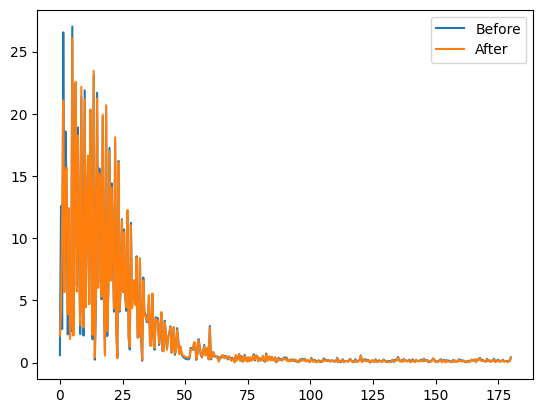

In [68]:
plt.plot(xf_before,np.abs(yf_before))
plt.plot(xf_after,np.abs(yf_after))
plt.legend(("Before","After"))

### Low Pass Filter with Convolution

In [69]:
from utils.common_utils import hanning_filter

In [101]:
filteredLowPass = hanning_filter(filteredHighPass,15)

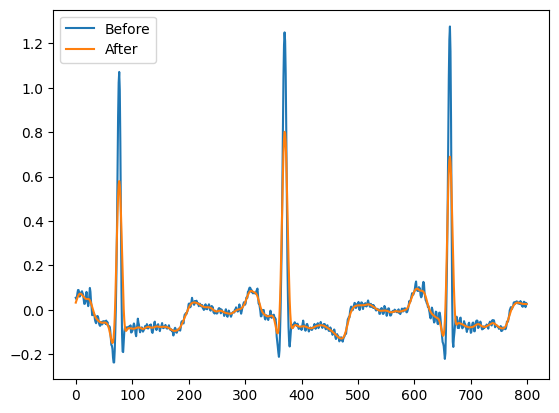

In [102]:
plt.plot(filteredHighPass[:800])
plt.plot(filteredLowPass[:800])
plt.legend(("Before","After"))

In [103]:
yf_before = rfft(filteredHighPass[:800])
xf_before = rfftfreq(len(filteredHighPass[:800]), 1 / 360)
yf_after = rfft(filteredLowPass[:800])
xf_after = rfftfreq(len(filteredLowPass[:800]), 1 / 360)

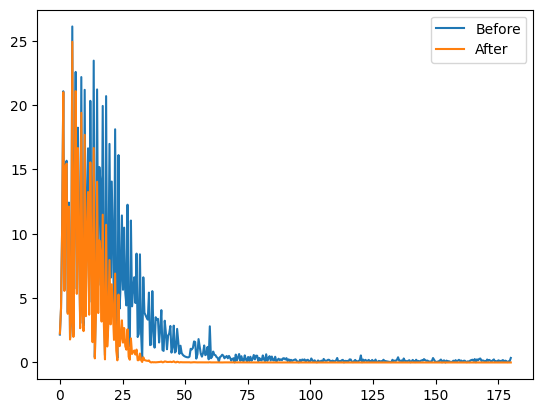

In [104]:
plt.plot(xf_before,np.abs(yf_before))
plt.plot(xf_after,np.abs(yf_after))
plt.legend(("Before","After"))

### Segmentation

In [115]:
from ecgdetectors import Detectors
detectors = Detectors(360)

In [116]:
r_peaks = detectors.hamilton_detector(filteredLowPass)

In [117]:
records[0].annotation_indexes()

array([    18,     77,    370, ..., 649484, 649734, 649991])

In [118]:
r_peaks

[119,
 383,
 676,
 947,
 1244,
 1528,
 1822,
 2057,
 2425,
 2719,
 3011,
 3296,
 3573,
 3876,
 4183,
 4479,
 4778,
 5082,
 5368,
 5647,
 5931,
 6227,
 6540,
 6845,
 7119,
 7391,
 7683,
 7966,
 8259,
 8552,
 8850,
 9163,
 9454,
 9723,
 10011,
 10295,
 10591,
 10916,
 11213,
 11493,
 11794,
 12079,
 12363,
 12658,
 12963,
 13287,
 13575,
 13855,
 14144,
 14436,
 14724,
 15024,
 15323,
 15620,
 15921,
 16196,
 16478,
 16768,
 17071,
 17371,
 17670,
 17960,
 18240,
 18527,
 18817,
 19094,
 19401,
 19706,
 20002,
 20293,
 20567,
 20851,
 21144,
 21445,
 21742,
 22043,
 22334,
 22616,
 22894,
 23177,
 23467,
 23769,
 24066,
 24358,
 24647,
 24913,
 25219,
 25498,
 25793,
 26109,
 26400,
 26683,
 26965,
 27250,
 27549,
 27846,
 28145,
 28444,
 28740,
 29035,
 29307,
 29593,
 29886,
 30195,
 30500,
 30792,
 31078,
 31361,
 31649,
 31941,
 32237,
 32543,
 32849,
 33140,
 33417,
 33704,
 33993,
 34287,
 34588,
 34883,
 35181,
 35468,
 35749,
 36029,
 36331,
 36618,
 36929,
 37228,
 37513,
 37796

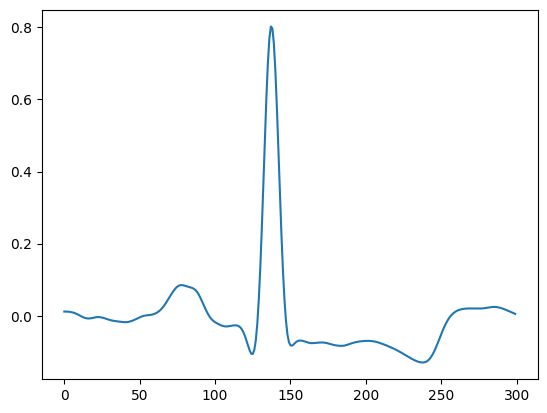

In [120]:
for i in range()